In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("../data/03_primary/bitalino/S11_pic_BITAL.parquet")

In [5]:
df_1 = df.dropna(subset=["valence_rating"])

In [27]:
df_mean = df_1.groupby(["image_id"]).mean(numeric_only=True).reset_index()

In [46]:
df.groupby(["image_id"]).count()

,EKG,light,EDA,HR,person_id,valence_rating,arousal_rating,valence_norm,arousal_norm
image_id,,,,,,,,,
0,16667,16667,16667,16667,16667,0,0,0,0
10000,604004,604004,604004,604004,604004,0,0,0,0
10010,2976,2976,2976,2976,2976,0,0,0,0
10011,4987,4987,4987,4987,4987,0,0,0,0
10012,5012,5012,5012,5012,5012,0,0,0,0
...,...,...,...,...,...,...,...,...,...
44031,5003,5003,5003,5003,5003,5003,5003,5003,5003
70000,11795,11795,11795,11795,11795,0,0,0,0
99990,528336,528336,528336,528336,528336,0,0,0,0


In [67]:
df_1.groupby(["image_id"]).mean(numeric_only=True).reset_index()

,image_id,EKG,light,EDA,HR,valence_rating,arousal_rating,valence_norm,arousal_norm
0,40112,32835.422900,11645.938959,14500.309196,72.049521,4.0,2.0,2.81630,6.3191
1,40122,32820.508441,12137.891360,13843.529295,71.106582,5.0,1.0,5.81630,4.8333
2,40131,32835.844804,11740.334131,16740.691801,70.021508,8.0,3.0,7.57000,5.1900
3,40212,32825.316720,11718.883641,17817.695941,72.455369,3.0,4.0,3.49200,74.0320
4,40221,32779.054313,11605.392572,15231.648163,82.162333,5.0,2.0,5.52310,4.6061
...,...,...,...,...,...,...,...,...,...
115,43922,32880.348860,12343.937625,19677.603159,76.176992,5.0,1.0,5.04000,2.7000
116,43932,32822.500100,11513.570401,13811.537448,72.769964,6.0,5.0,7.92000,4.8085
117,44011,32832.604763,11952.460476,15408.488693,69.720811,2.0,3.0,3.47000,4.4500
118,44022,32733.553375,11689.647907,16090.205087,76.842283,3.0,3.0,4.60870,5.2553


In [83]:
df_4111 = df[df["image_id"] == 41111].reset_index(drop=True).reset_index()
df_43211 = df[df["image_id"] == 43211].reset_index(drop=True).reset_index()
df_41911 = df[df["image_id"] == 41911].reset_index(drop=True).reset_index()

df_42932 = df[df["image_id"] == 42932].reset_index(drop=True).reset_index()
df_43232 = df[df["image_id"] == 43232].reset_index(drop=True).reset_index()
df_44031 = df[df["image_id"] == 44031].reset_index(drop=True).reset_index()

In [118]:
from scipy.signal import argrelextrema
import numpy as np

n = 600

df_4111['max'] = df_4111.iloc[argrelextrema(df_4111["EKG"].values, np.greater_equal, order=n)[0]]["EKG"]

In [128]:
xd_4111 = df_4111.iloc[argrelextrema(df_4111["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_43211 = df_43211.iloc[argrelextrema(df_43211["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_41911 = df_41911.iloc[argrelextrema(df_41911["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()

xd_42932 = df_42932.iloc[argrelextrema(df_42932["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_43232 = df_43232.iloc[argrelextrema(df_43232["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_44031 = df_44031.iloc[argrelextrema(df_44031["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()

In [152]:
df.columns

Index(['EKG', 'light', 'EDA', 'HR', 'image_id', 'person_id', 'valence_rating',
       'arousal_rating', 'valence_norm', 'arousal_norm'],
      dtype='object')

In [163]:
def my_algo(df_full, images, name):
    dct = pd.DataFrame(columns=["image_id", name, "mean_diff"])
    for image in images:
        df_partial = df_full[df_full["image_id"] == image].reset_index(drop=True).reset_index()
        mean = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
        maxi = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().max()
        mini = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().min()

        rating = df_partial[name].iloc[0]
        item = pd.DataFrame({"image_id": [image],
                             name: [rating],
                             "mean_diff": [mean],
                             "maxi_diff": [maxi],
                             "mini_diff": [mini]})
        dct = pd.concat([dct, item])
    return dct


In [165]:
df_result_arousal_rating = my_algo(df, df_1["image_id"].unique().tolist(), "arousal_rating")
df_result_valence_rating = my_algo(df, df_1["image_id"].unique().tolist(), "valence_rating")


In [178]:
df_result_valence_rating

,image_id,valence_rating,mean_diff,maxi_diff,mini_diff
0,41331,6.0,793.400000,809.0,773.0
0,43422,4.0,685.166667,835.0,1.0
0,43922,5.0,794.833333,808.0,768.0
0,43012,3.0,818.200000,837.0,799.0
0,41131,7.0,807.200000,834.0,791.0
...,...,...,...,...,...
0,42911,4.0,673.571429,817.0,1.0
0,43712,3.0,783.600000,793.0,757.0
0,40231,5.0,771.666667,827.0,705.0
0,41712,3.0,762.833333,779.0,746.0


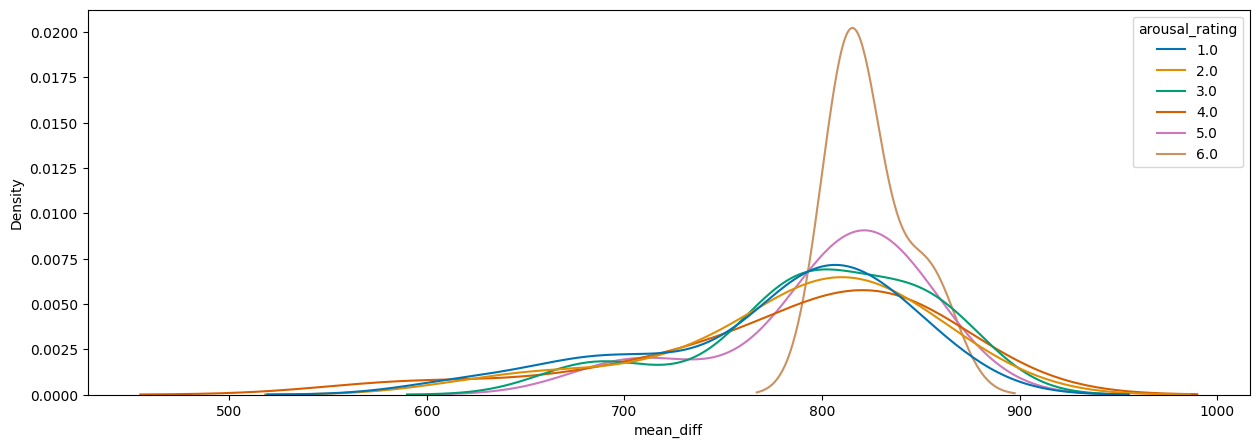

In [176]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df_result_arousal_rating, x="mean_diff", hue="arousal_rating", common_norm=False, palette="colorblind")
plt.show()

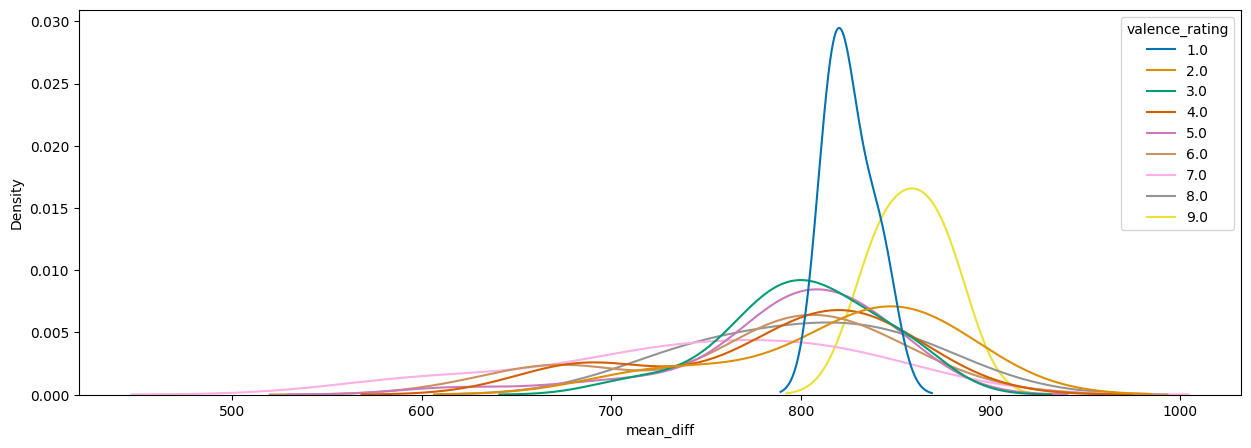

In [177]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df_result_valence_rating, x="mean_diff", hue="valence_rating", common_norm=False, palette="colorblind")
plt.show()

In [166]:
df_result_valence_rating.groupby("valence_rating").mean()

C:\Users\dbugajny\AppData\Local\Temp\ipykernel_8028\76181865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result_valence_rating.groupby("valence_rating").mean()


,mean_diff,maxi_diff,mini_diff
valence_rating,,,
1.0,825.650000,879.250000,760.250000
2.0,822.620000,899.200000,646.000000
3.0,801.785476,834.950000,732.300000
4.0,788.262434,848.888889,597.666667
5.0,792.084000,849.400000,667.440000
6.0,777.199179,840.448276,585.862069
7.0,744.684615,836.153846,469.153846
8.0,801.933333,838.333333,760.666667
9.0,857.933333,902.000000,829.000000


In [167]:
df_result_arousal_rating.groupby("arousal_rating").mean()

C:\Users\dbugajny\AppData\Local\Temp\ipykernel_8028\2711982214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result_arousal_rating.groupby("arousal_rating").mean()


,mean_diff,maxi_diff,mini_diff
arousal_rating,,,
1.0,776.593741,840.542857,591.342857
2.0,787.189094,842.774194,641.677419
3.0,798.779724,848.935484,675.645161
4.0,783.227106,862.307692,597.692308
5.0,802.596032,858.166667,635.500000
6.0,824.541667,867.500000,775.500000


In [139]:
df_1["valence_rating"].iloc[0]

6.0

In [130]:
xd_4111, xd_43211, xd_41911, xd_42932, xd_43232, xd_44031

(827.0, 816.4, 815.2, 858.2, 877.0, 743.8)

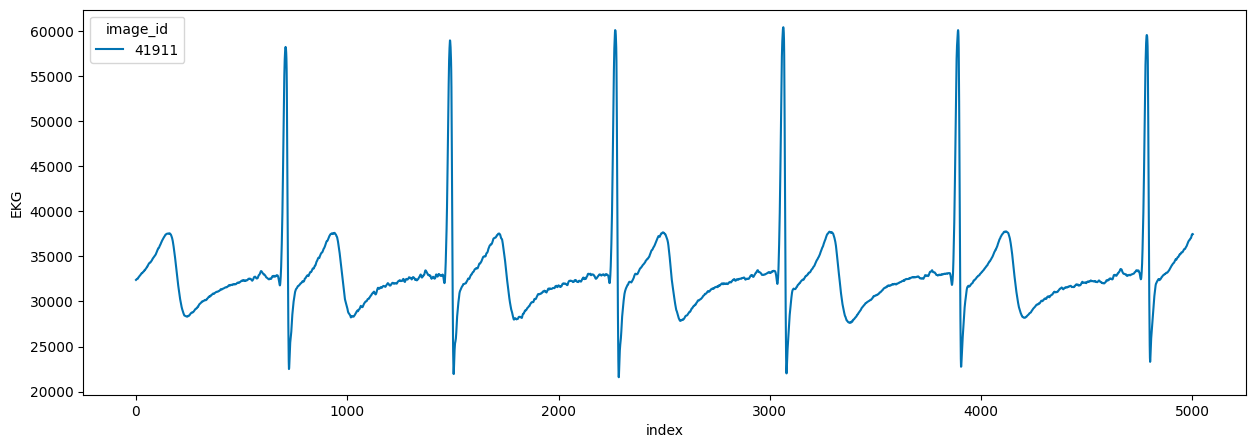

In [86]:
-plt.figure(figsize=(15, 5))
# cc = pd.concat([df_4111, df_43211,df_41212, df_42932, df_43232, df_43632])
cc = pd.concat([ df_41911, df_42932, df_43232])

sns.lineplot(data=cc, x="index", y="EKG", hue="image_id", palette="colorblind")
plt.show()